In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import required libraries

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customersdata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BI/Ecommerce Customers.csv")

In [4]:
customersdata.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customersdata.shape

(500, 8)

In [6]:
customersdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
customersdata.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


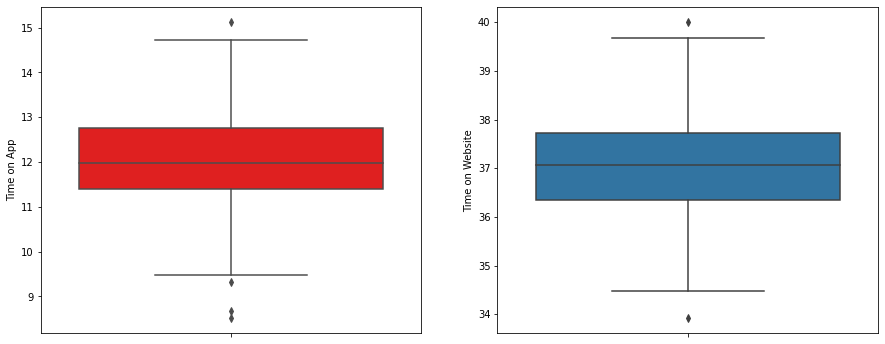

In [8]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=customersdata["Time on App"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=customersdata["Time on Website"])
plt.show()

In [9]:
kmeans_model = KMeans(init='k-means++',  max_iter=400, random_state=42)

In [10]:
# Train the model
kmeans_model.fit(customersdata[['Avg. Session Length','Length of Membership',
'Yearly Amount Spent']])

KMeans(max_iter=400, random_state=42)

In [11]:
# Create the K means model for different values of K
def try_different_clusters(K, data):
       
    cluster_values = list(range(1, K+1))
    inertias=[]
    
    for c in cluster_values:
        model = KMeans(n_clusters = c,init='k-means++',max_iter=400,random_state=42)
        model.fit(data)
        inertias.append(model.inertia_)
    
    return inertias

In [12]:
# Find output for k values between 1 to 12 
outputs = try_different_clusters(12, customersdata[['Avg. Session Length','Length of Membership','Yearly Amount Spent']])
distances = pd.DataFrame({"clusters": list(range(1, 13)),"sum of squared distances": outputs})
distances

,clusters,sum of squared distances
0,1,3.140116e+06
1,2,1.230455e+06
2,3,6.606211e+05
3,4,4.261377e+05
4,5,2.745798e+05
5,6,1.950785e+05
6,7,1.411855e+05
7,8,1.129763e+05
8,9,8.603040e+04
9,10,6.957536e+04


In [13]:
# Finding optimal number of clusters k
figure = go.Figure()
figure.add_trace(go.Scatter(x=distances["clusters"], y=distances["sum of squared distances"]))

figure.update_layout(xaxis = dict(tick0 = 1,dtick = 1,tickmode = 'linear'),                  
                  xaxis_title="Number of clusters",
                  yaxis_title="Sum of squared distances",
                  title_text="Finding optimal number of clusters using elbow method")
figure.show()

In [14]:
# Re-Train K means model with k=5
kmeans_model_new = KMeans(n_clusters = 5,init='k-means++',max_iter=400,random_state=42)

kmeans_model_new.fit_predict(customersdata[['Avg. Session Length','Length of Membership','Yearly Amount Spent']])

array([0, 4, 3, 0, 0, 1, 3, 0, 0, 4, 3, 3, 4, 0, 3, 3, 3, 4, 4, 1, 0, 4,
       4, 3, 1, 4, 1, 3, 0, 0, 3, 4, 0, 3, 3, 3, 2, 3, 3, 0, 0, 3, 0, 0,
       4, 0, 0, 0, 3, 4, 1, 4, 4, 4, 3, 3, 3, 4, 3, 0, 1, 3, 1, 3, 0, 1,
       0, 3, 4, 4, 4, 0, 4, 0, 0, 3, 4, 0, 3, 3, 3, 3, 0, 2, 0, 0, 3, 3,
       0, 3, 4, 1, 3, 4, 3, 0, 3, 1, 3, 3, 3, 4, 4, 3, 4, 3, 3, 4, 0, 0,
       3, 3, 4, 4, 1, 4, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3, 0, 4, 0, 0,
       4, 0, 4, 3, 0, 4, 3, 4, 4, 3, 3, 2, 3, 3, 3, 3, 4, 3, 4, 1, 0, 1,
       0, 3, 0, 1, 3, 0, 3, 2, 0, 3, 0, 3, 3, 0, 3, 3, 4, 4, 1, 2, 3, 4,
       0, 0, 0, 3, 3, 0, 3, 4, 0, 3, 4, 0, 0, 3, 1, 3, 3, 0, 4, 4, 2, 1,
       0, 3, 3, 0, 4, 4, 0, 1, 4, 0, 4, 3, 3, 0, 0, 0, 2, 0, 4, 0, 4, 3,
       3, 0, 3, 1, 0, 2, 0, 3, 3, 4, 0, 3, 1, 3, 3, 3, 3, 4, 4, 0, 4, 0,
       4, 3, 0, 4, 0, 1, 4, 3, 3, 4, 4, 3, 3, 0, 0, 0, 1, 4, 1, 3, 4, 3,
       1, 0, 0, 4, 3, 0, 0, 1, 0, 1, 4, 0, 4, 1, 0, 4, 3, 0, 3, 4, 3, 3,
       1, 4, 2, 3, 3, 4, 0, 4, 0, 4, 3, 3, 0, 2, 3,

In [15]:
# Create data arrays
cluster_centers = kmeans_model_new.cluster_centers_
data = np.expm1(cluster_centers)
points = np.append(data, cluster_centers, axis=1)
points

array([[3.28143388e+014, 6.04945772e+001, 1.50489467e+242,
        3.34244718e+001, 4.11894900e+000, 5.57634315e+002],
       [3.75426679e+014, 1.49529047e+002, 7.23636443e+281,
        3.35590843e+001, 5.01415607e+000, 6.49005530e+002],
       [1.12831202e+014, 3.57139085e+000, 6.21998547e+140,
        3.23569140e+001, 1.51981750e+000, 3.24189681e+002],
       [2.00433458e+014, 3.14805643e+001, 1.89176827e+213,
        3.29315034e+001, 3.48064189e+000, 4.91088137e+002],
       [1.63893943e+014, 1.47715999e+001, 6.01604243e+182,
        3.27302406e+001, 2.75821085e+000, 4.20864917e+002]])

In [16]:
# Add "clusters" to customers data
points = np.append(points, [[0], [1], [2], [3], [4]], axis=1)
customersdata["clusters"] = kmeans_model_new.labels_

In [17]:
customersdata.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,clusters
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,0
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,4
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,3
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,0
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,0


In [18]:
# visualize clusters
figure = px.scatter_3d(customersdata,
                    color='clusters',
                    x="Avg. Session Length",
                    y="Length of Membership",
                    z="Yearly Amount Spent",            
                    category_orders = {"clusters": ["0", "1", "2", "3", "4"]}                    
                    )
figure.update_layout()
figure.show()